In [1]:
from main import load_edgelist
from typing import List, Dict
from paco import TimeStampedLinkList, paco
from time import time
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from baseline import create_temporal_network, get_total_causal_paths
import random
import pandas as pd

In [2]:
dataset = pd.read_csv('soc-sign-bitcoinotc.csv', header=None)
dataset.columns = ['source', 'target', 'rating', 'timestamp']
edge_list = [(int(row['source']), int(row['target']), int(row['timestamp'])) for _, row in dataset.iterrows()]

In [3]:
delta = 30
k = 4

In [4]:
data = TimeStampedLinkList.from_edgelist(edge_list)

In [5]:
def random_percentage_subset(input_list, percentage, seed=None):
    if not 0 <= percentage <= 100:
        raise ValueError("Percentage must be between 0 and 100.")

    # Set the seed for reproducibility
    random.seed(seed)

    # Calculate the number of elements to include
    num_elements = int(len(input_list) * (percentage / 100))

    # Randomly select elements
    subset = random.sample(input_list, num_elements)

    return subset

## PaCo

In [6]:
def execute_paco(data, delta, k):     
    start = time()
    C = paco(data, delta, k)
    end = time()
    count = sum(C.values())
    return count, end-start

In [7]:
splits = 5
results = []
for s in trange(1, splits + 1):
    # Get percentage
    percentage = int(100 / splits * s)
    # Split dataset
    n_edges = random_percentage_subset(edge_list, percentage, 28)
    n_links = len(n_edges)
    data = TimeStampedLinkList.from_edgelist(n_edges)
    count, runtime = execute_paco(data, delta, k)
    results.append((count, runtime, round(n_links / 10**3)))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.38it/s]


In [8]:
_, paco_runtimes_sec, paco_n_links = zip(*results)

## Baseline

In [9]:
splits = 5
results = []
for s in trange(1, splits + 1):
    # Get percentage
    percentage = int(100 / splits * s)
    
    # Split dataset
    n_edges = random_percentage_subset(edge_list, percentage, 28)
    n_links = len(n_edges)
    
    # Create pathpy temporal network
    t = create_temporal_network(n_edges)
    
    # Calculate paths
    count, runtime = get_total_causal_paths(t, delta, k)
    
    
    results.append((count, runtime, round(n_links / 10**3)))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7118/7118 [00:00<00:00, 50481.58it/s]

2023-12-17 23:52:57 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-17 23:52:59 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		220563
Roots:		7053
Leaves:		213451
Links:		213540
Acyclic:	None

2023-12-17 23:52:59 [Severity.INFO]	Generating causal trees for 7053 root nodes ...
2023-12-17 23:52:59 [Severity.INFO]	finished.


 20%|███████████████████████████████████▍                                                                                                                                             | 1/5 [00:02<00:09,  2.27s/it]

Number of causal paths: Total path count: 		7059.0 
[Unique / Sub paths / Total]: 	[7059.0 / 14295.0 / 21354.0]
Nodes:				3468 
Edges:				7118
Max. path length:		2
Avg path length:		1.0083581243802238 
Paths of length k = 0		0.0 [ 0.0 / 14177.0 / 14177.0 ]
Paths of length k = 1		7000.0 [ 7000.0 / 118.0 / 7118.0 ]
Paths of length k = 2		59.0 [ 59.0 / 0.0 / 59.0 ]





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14236/14236 [00:00<00:00, 59606.04it/s]

2023-12-17 23:53:00 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-17 23:53:03 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		440722
Roots:		13896
Leaves:		426511
Links:		427080
Acyclic:	None

2023-12-17 23:53:03 [Severity.INFO]	Generating causal trees for 13896 root nodes ...
2023-12-17 23:53:04 [Severity.INFO]	finished.


 40%|██████████████████████████████████████████████████████████████████████▊                                                                                                          | 2/5 [00:06<00:10,  3.51s/it]

Number of causal paths: Total path count: 		13922.0 
[Unique / Sub paths / Total]: 	[13922.0 / 28791.0 / 42713.0]
Nodes:				4591 
Edges:				14236
Max. path length:		3
Avg path length:		1.0226260594742134 
Paths of length k = 0		0.0 [ 0.0 / 28159.0 / 28159.0 ]
Paths of length k = 1		13609.0 [ 13609.0 / 628.0 / 14237.0 ]
Paths of length k = 2		311.0 [ 311.0 / 4.0 / 315.0 ]
Paths of length k = 3		2.0 [ 2.0 / 0.0 / 2.0 ]





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21355/21355 [00:00<00:00, 42097.39it/s]

2023-12-17 23:53:04 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-17 23:53:10 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		660664
Roots:		20572
Leaves:		639364
Links:		640650
Acyclic:	None

2023-12-17 23:53:10 [Severity.INFO]	Generating causal trees for 20572 root nodes ...
2023-12-17 23:53:11 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		20630.0 
[Unique / Sub paths / Total]: 	[20630.0 / 43451.0 / 64081.0]
Nodes:				5228 
Edges:				21355
Max. path length:		3
Avg path length:		1.035336888027145 
Paths of length k = 0		0.0 [ 0.0 / 41989.0 / 41989.0 ]
Paths of length k = 1		19905.0 [ 19905.0 / 1454.0 / 21359.0 ]
Paths of length k = 2		721.0 [ 721.0 / 8.0 / 729.0 ]
Paths of length k = 3		4.0 [ 4.0 / 0.0 / 4.0 ]




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28473/28473 [00:00<00:00, 46303.79it/s]

2023-12-17 23:53:12 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-17 23:53:19 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		880400
Roots:		27125
Leaves:		852017
Links:		854190
Acyclic:	None

2023-12-17 23:53:19 [Severity.INFO]	Generating causal trees for 27125 root nodes ...
2023-12-17 23:53:19 [Severity.INFO]	Analyzing tree 5425/27125 ...
2023-12-17 23:53:20 [Severity.INFO]	Analyzing tree 10850/27125 ...
2023-12-17 23:53:20 [Severity.INFO]	Analyzing tree 16275/27125 ...
2023-12-17 23:53:20 [Severity.INFO]	Analyzing tree 21700/27125 ...
2023-12-17 23:53:20 [Severity.INFO]	Analyzing tree 27125/27125 ...
2023-12-17 23:53:20 [Severity.INFO]	finished.


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 4/5 [00:23<00:06,  6.95s/it]

Number of causal paths: Total path count: 		27221.0 
[Unique / Sub paths / Total]: 	[27221.0 / 58224.0 / 85445.0]
Nodes:				5645 
Edges:				28473
Max. path length:		3
Avg path length:		1.0462510561698688 
Paths of length k = 0		0.0 [ 0.0 / 55701.0 / 55701.0 ]
Paths of length k = 1		25967.0 [ 25967.0 / 2513.0 / 28480.0 ]
Paths of length k = 2		1249.0 [ 1249.0 / 10.0 / 1259.0 ]
Paths of length k = 3		5.0 [ 5.0 / 0.0 / 5.0 ]





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35592/35592 [00:00<00:00, 44937.52it/s]

2023-12-17 23:53:22 [Severity.INFO]	Constructing time-unfolded DAG ...


2023-12-17 23:53:30 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		1099766
Roots:		33541
Leaves:		1064299
Links:		1067760
Acyclic:	None

2023-12-17 23:53:30 [Severity.INFO]	Generating causal trees for 33541 root nodes ...
2023-12-17 23:53:32 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		33678.0 
[Unique / Sub paths / Total]: 	[33678.0 / 73155.0 / 106833.0]
Nodes:				5881 
Edges:				35592
Max. path length:		3
Avg path length:		1.0572480551101608 
Paths of length k = 0		0.0 [ 0.0 / 69284.0 / 69284.0 ]
Paths of length k = 1		31765.0 [ 31765.0 / 3841.0 / 35606.0 ]
Paths of length k = 2		1898.0 [ 1898.0 / 30.0 / 1928.0 ]
Paths of length k = 3		15.0 [ 15.0 / 0.0 / 15.0 ]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:35<00:00,  7.06s/it]


In [10]:
_, baseline_runtimes_sec, baseline_n_links = zip(*results)

## Plots

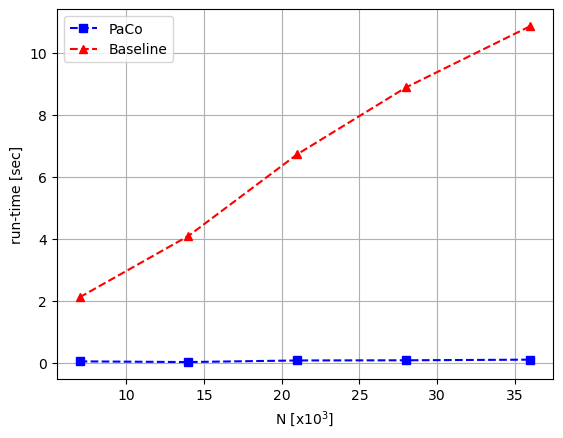

In [11]:
plt.plot(paco_n_links, paco_runtimes_sec, 's--', color='blue',label="PaCo")
plt.plot(baseline_n_links, baseline_runtimes_sec, '^--', color='red',label="Baseline")
plt.xlabel("N [x$10^3$]")
plt.ylabel("run-time [sec]")
plt.grid(True)
plt.legend()
plt.savefig('plots/socbitcoin_left_panel.png')
plt.show()